<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Comparing Clustering Algorithm Effectiveness

_Authors: Kiefer Katovich (SF)_

---

In this lab you'll try three clustering algorithms we've covered on 7 different datasets specifically designed to evaluate clustering algorithm effectiveness.

This lab is exploratory and data visualization heavy!


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

---

### 1. Load the datasets

Each of the seven datasets have 3 columns:

    x
    y
    label
    
Since they each only have two variables, they are easy to examine visually. The label column is the "true" label for the data that you will compare to the clusters the algorithms find.

In [2]:
flame = pd.read_csv('./data/flame.csv')
agg = pd.read_csv('./data/aggregation.csv')
comp = pd.read_csv('./data/compound.csv')
jain = pd.read_csv('./data/jain.csv')
path = pd.read_csv('./data/pathbased.csv')
r15 = pd.read_csv('./data/r15.csv')
spiral = pd.read_csv('./data/spiral.csv')

In [3]:
agg.head()

,x,y,label
0,15.55,28.65,2
1,14.90,27.55,2
2,14.45,28.35,2
3,14.15,28.80,2
4,13.75,28.05,2


---

### 2. Plot each of the datasets with the true labels colored

The datasets have different numbers of unique labels, so you will need to figure out how many there are for each one and color the clusters accordingly (r15 has 15 different clusters).

In [4]:
def plot_clusters(df, title):
    fig, ax = plt.subplots(figsize=(5,5))
    
    colors = plt.cm.Spectral(np.linspace(0, 1, len(df.label.unique())))
    
    for label, color in zip(df.label.unique(), colors):
        X = df[df.label == label]
        ax.scatter(X.iloc[:,0], X.iloc[:,1], s=70, 
                   color=color, label=label, alpha=0.9)
        
    ax.set_title(title, fontsize=20)
    ax.legend(loc='lower right')
    
    plt.show()

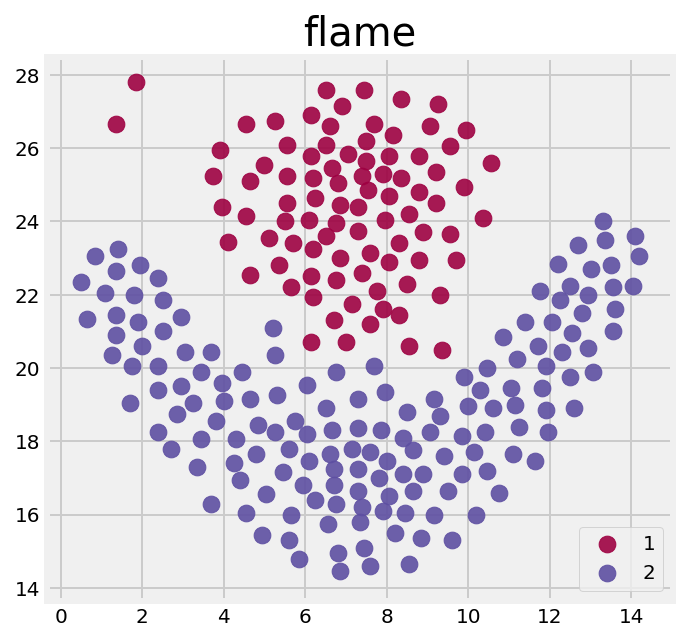

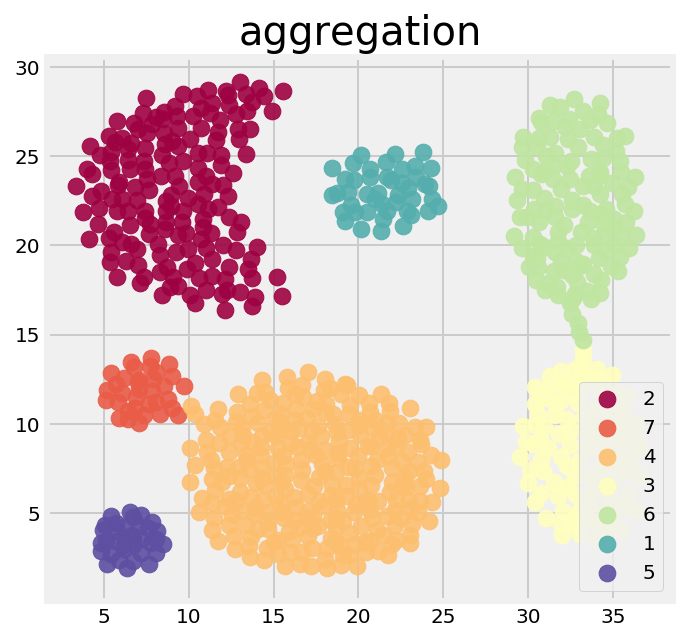

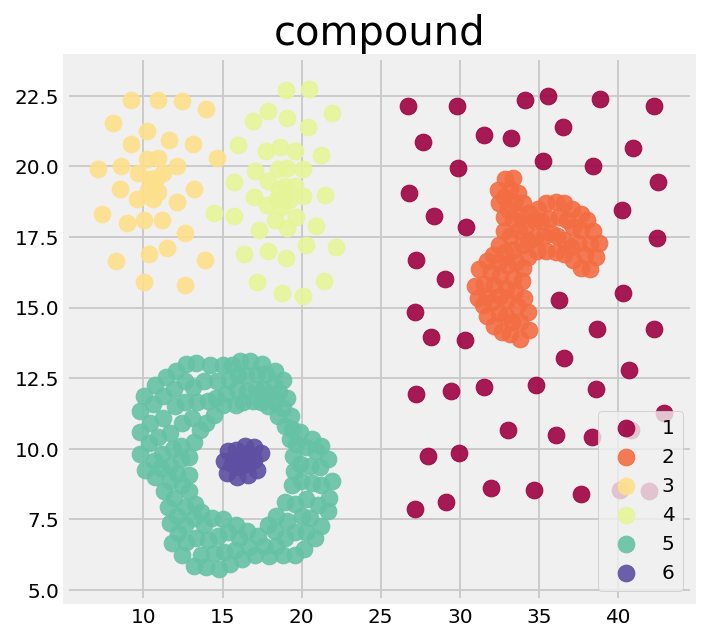

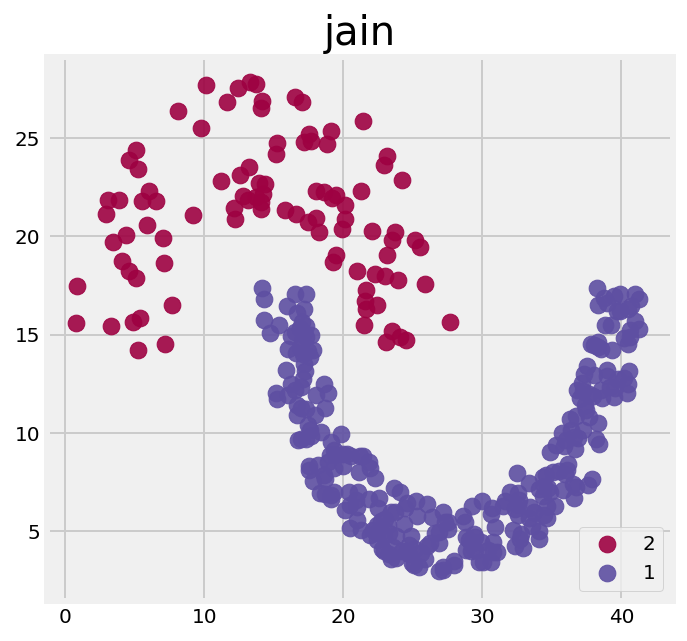

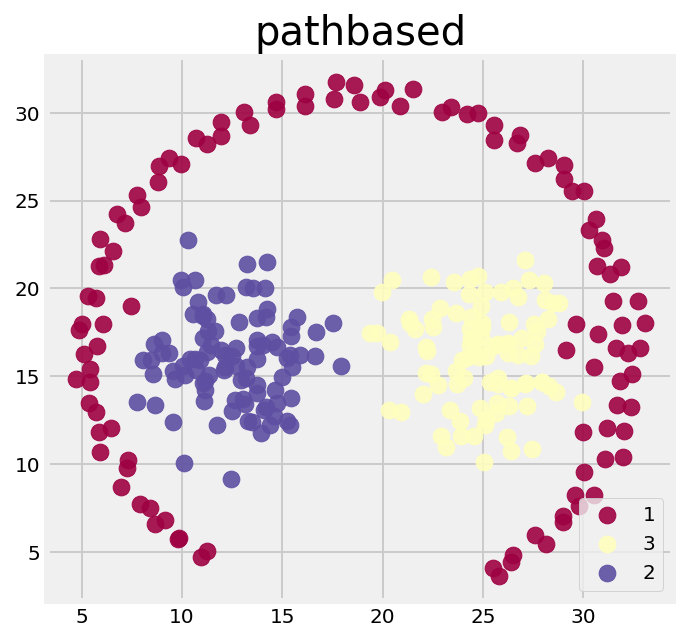

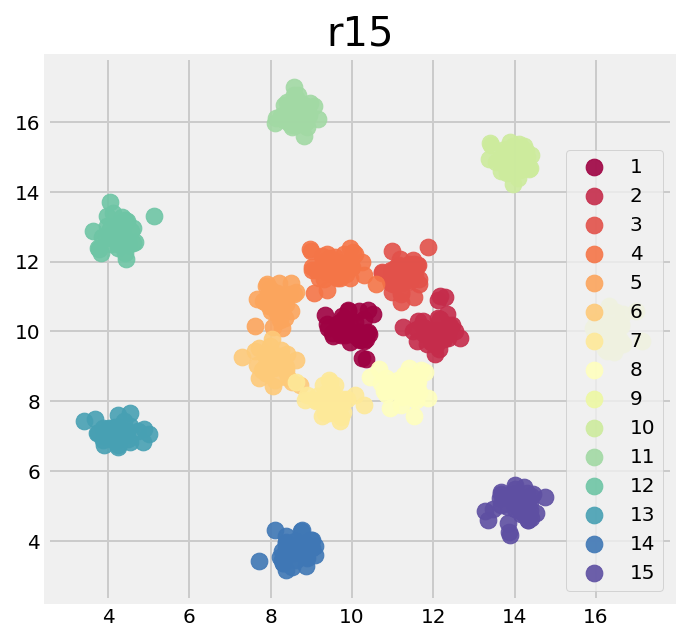

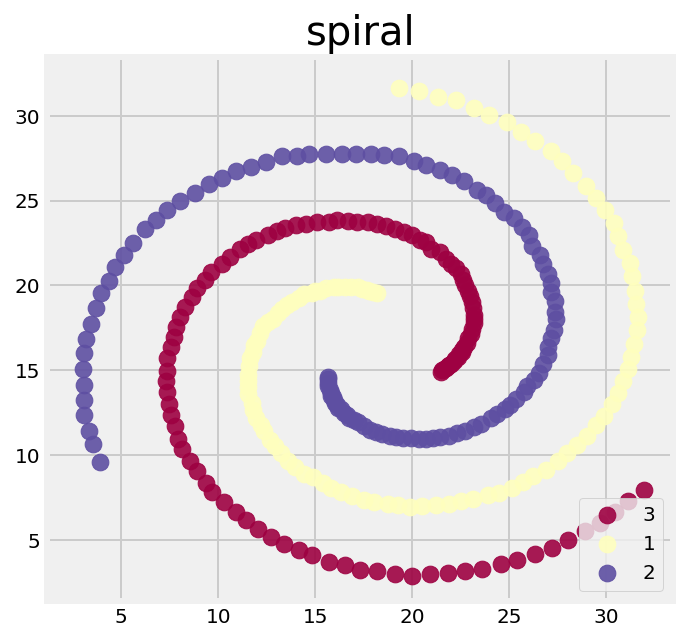

In [5]:
for title, df in zip(['flame','aggregation','compound','jain','pathbased','r15','spiral'],
                     [flame, agg, comp, jain, path, r15, spiral]):
    plot_clusters(df, title)

---

### 3. Write a plotting function or functions to compare the performance of three clustering algorithms

Below three clustering algorithms we have covered earlier in the class are loaded in.

    KMeans: k-means clustering
    AgglomerativeClustering: Hierarchical clustering (bottom-up)
    DBSCAN: density based clustering
    
Your function or functions should allow you to visually examine the effect of changing different parameters in the clustering algorithms. The parameters that you should explore at least are:

    KMeans:
        n_clusters
    AgglomerativeClustering:
        n_clusters
    DBSCAN
        eps
        min_samples
        
You are, of course, welcome to explore other parameters for these models.


In [6]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score

In [7]:
X = flame.iloc[:, 0:2]
kmeans = KMeans(n_clusters=3)
kmeans.fit(X.iloc[:, 0:2])


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

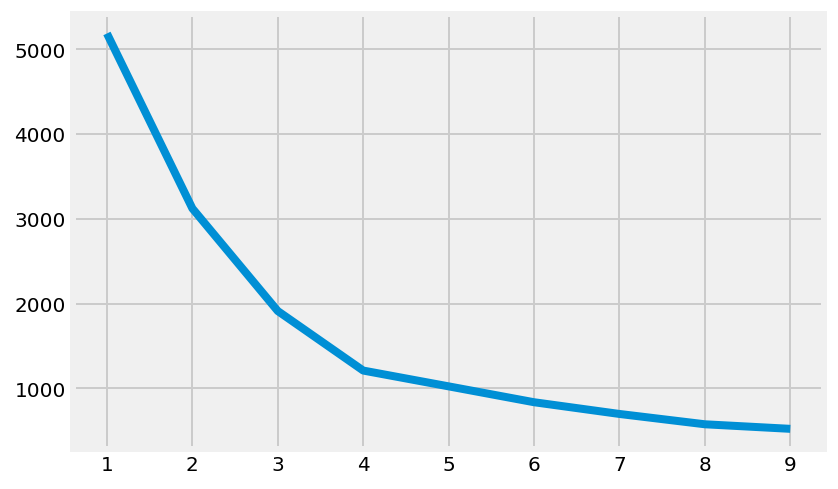

In [8]:
centers = []
scores = []
for k in range(1,10):
    kmeans = KMeans(k)
    kmeans.fit(X.iloc[:, 0:2])
    scores.append(np.abs(kmeans.score(X.iloc[:, 0:2])))
    centers.append(k)
    
plt.plot(centers, scores)

In [9]:
def plot_competing_algos(df, title, n_clusters_kmeans=3, n_clusters_agg=3,
                         dbscan_eps=3, dbscan_min_samples=5):
    
    fig, axarr = plt.subplots(1,4, figsize=(24,7))
    
    # TRUE:
    colors = plt.cm.Spectral(np.linspace(0, 1, len(df.label.unique())))
    
    for label, color in zip(df.label.unique(), colors):
        X_ = df[df.label == label]
        axarr[0].scatter(X_.iloc[:,0], X_.iloc[:,1], s=70, 
                         color=color, label=label, alpha=0.9)
        
    axarr[0].set_title(title+' '+'true', fontsize=20)
    axarr[0].legend(loc='lower right')
    
    # setup X:
    X = df.iloc[:, 0:2]
    
    # K-MEANS:
    kmeans = KMeans(n_clusters=n_clusters_kmeans)
    kmeans.fit(X.iloc[:, 0:2])
    
    X['kmeans_label'] = kmeans.labels_
    
    colors = plt.cm.Spectral(np.linspace(0, 1, len(X.kmeans_label.unique())))
    
    for label, color in zip(X.kmeans_label.unique(), colors):
        X_ = X[X.kmeans_label == label]
        axarr[1].scatter(X_.iloc[:,0], X_.iloc[:,1], s=70, 
                         color=color, label=label, alpha=0.9)
        
    axarr[1].set_title(title+' '+'kmeans', fontsize=20)
    axarr[1].legend(loc='lower right')
    
    
    # HIERARCHICAL/AGGLOMERATIVE:
    aggclust = AgglomerativeClustering(n_clusters=n_clusters_agg)
    aggclust.fit(X.iloc[:, 0:2])
    
    X['aggclust_label'] = aggclust.labels_
    
    colors = plt.cm.Spectral(np.linspace(0, 1, len(X.aggclust_label.unique())))
    
    for label, color in zip(X.aggclust_label.unique(), colors):
        X_ = X[X.aggclust_label == label]
        axarr[2].scatter(X_.iloc[:,0], X_.iloc[:,1], s=70, 
                         color=color, label=label, alpha=0.9)
        
    axarr[2].set_title(title+' '+'agglomerative', fontsize=20)
    axarr[2].legend(loc='lower right')
    
    
    # DBSCAN:
    dbscan = DBSCAN(eps=dbscan_eps, min_samples=dbscan_min_samples)
    dbscan.fit(X.iloc[:, 0:2])
    
    X['dbscan_label'] = dbscan.labels_
    
    colors = plt.cm.Spectral(np.linspace(0, 1, len(X.dbscan_label.unique())))
    
    for label, color in zip(X.dbscan_label.unique(), colors):
        X_ = X[X.dbscan_label == label]
        axarr[3].scatter(X_.iloc[:,0], X_.iloc[:,1], s=70, 
                         color=color, label=label, alpha=0.9)
        
    axarr[3].set_title(title+' '+'DBSCAN', fontsize=20)
    axarr[3].legend(loc='lower right')
    
    
    

## 4. Tinkering with clustering parameters

In the next sections, play around with the parameters for the clustering algorithms to see their effect and try to get clusters that make sense. There is no right answer here, as these are unsupervised techniques.

---

### 4.1 Find good parameters for the `flame` dataset

Which algorithm (visually) performs best?

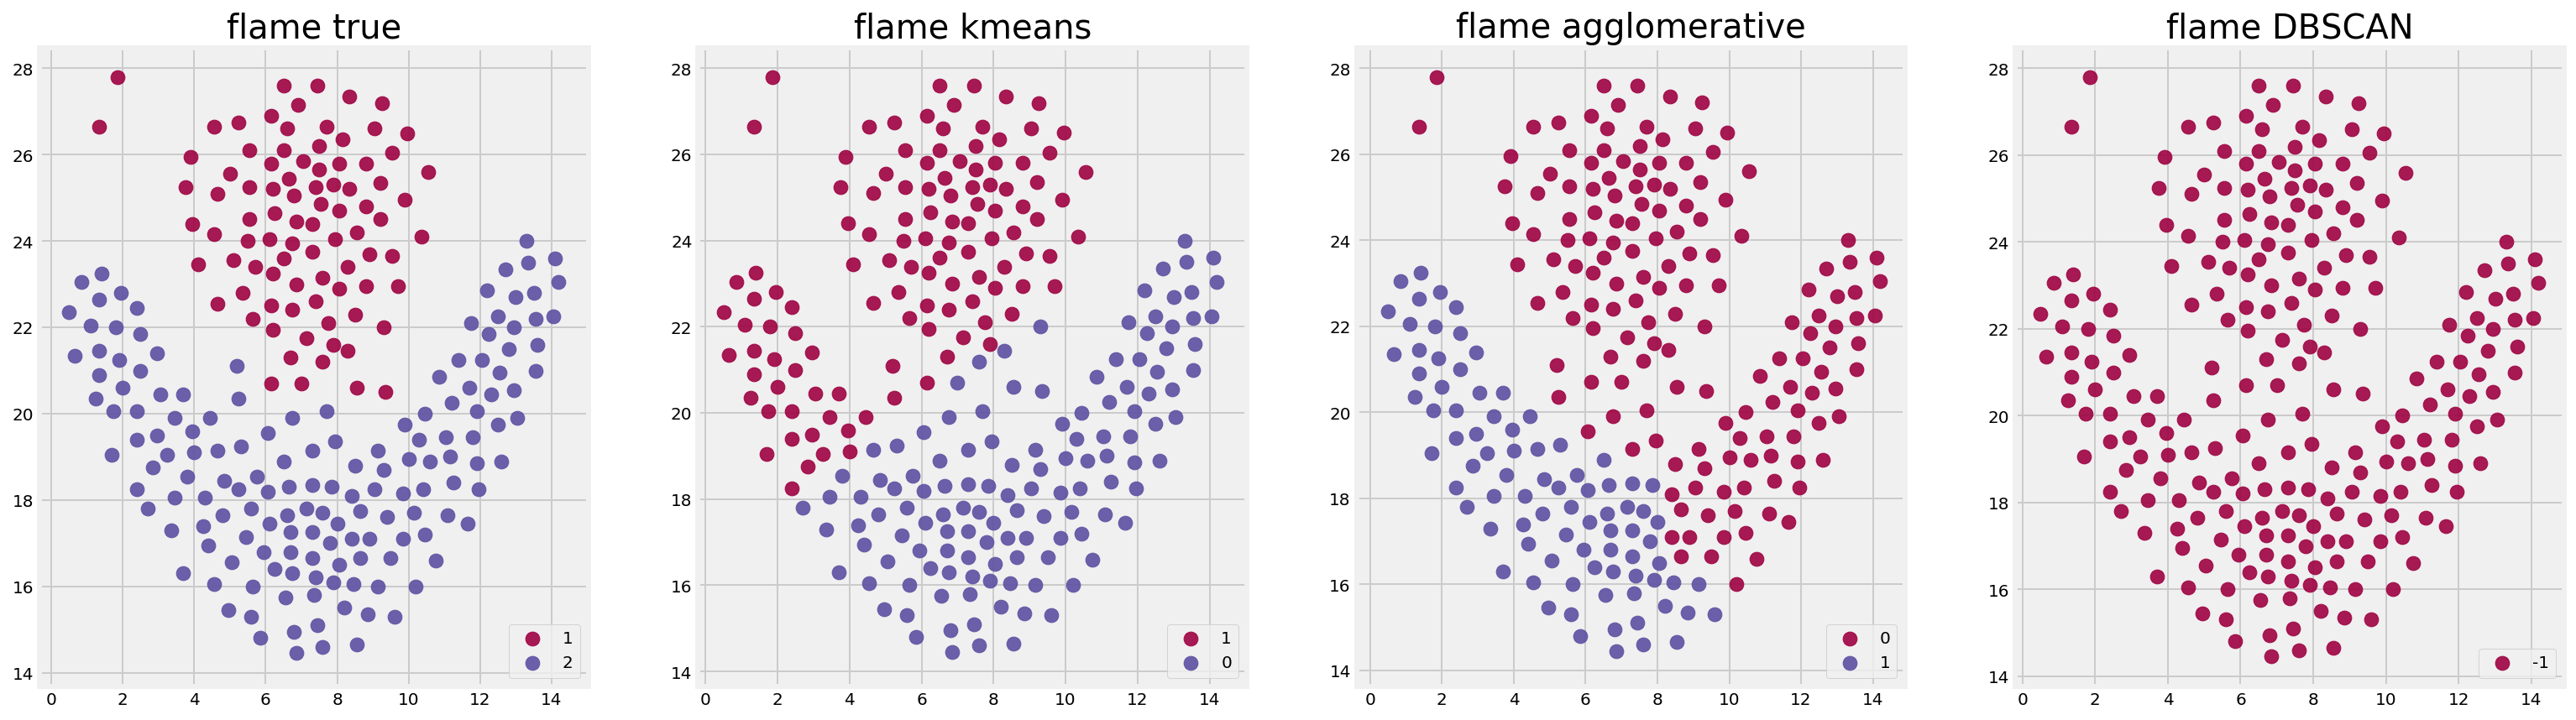

In [10]:
plot_competing_algos(flame, 'flame', n_clusters_kmeans=2, n_clusters_agg=2,
                     dbscan_eps=0.5, dbscan_min_samples=5)

---

### 4.2 Find good parameters for the `agg` dataset

Which algorithm (visually) performs best?

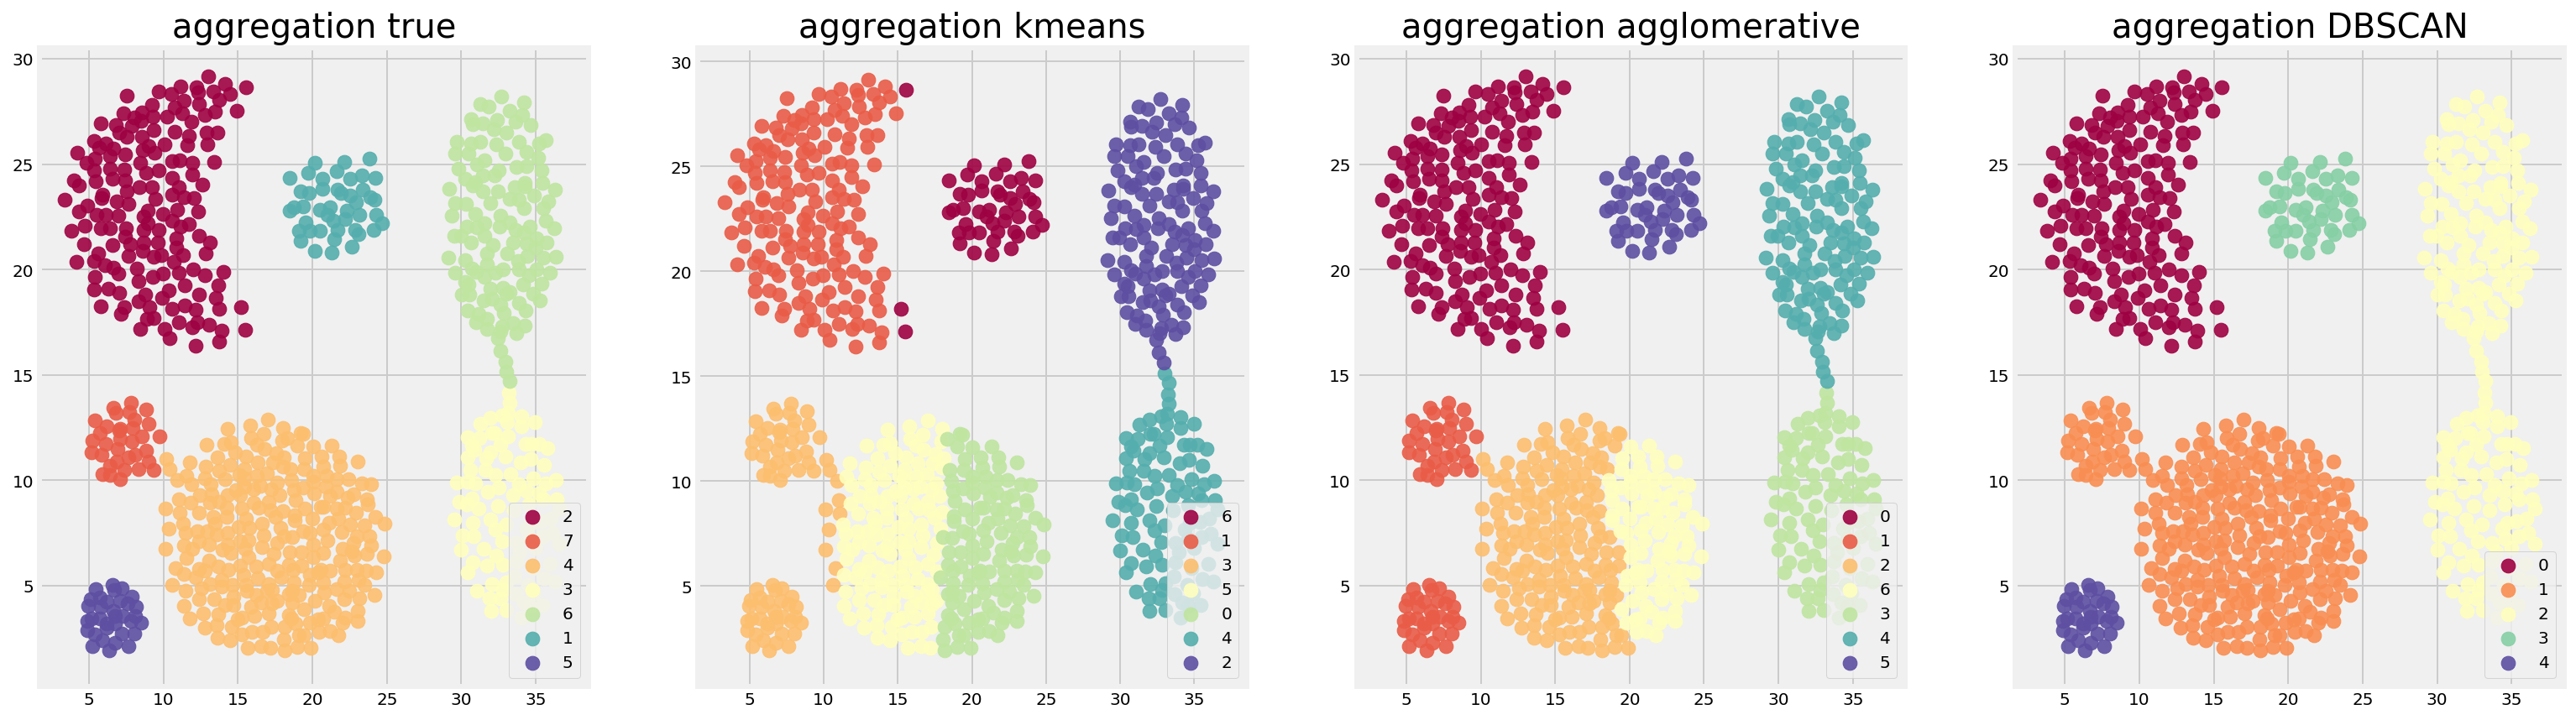

In [11]:
plot_competing_algos(agg, 'aggregation', n_clusters_kmeans=7, n_clusters_agg=7,
                     dbscan_eps=2, dbscan_min_samples=5)

---

### 4.3 Find good parameters for the `comp` dataset

Which algorithm (visually) performs best?

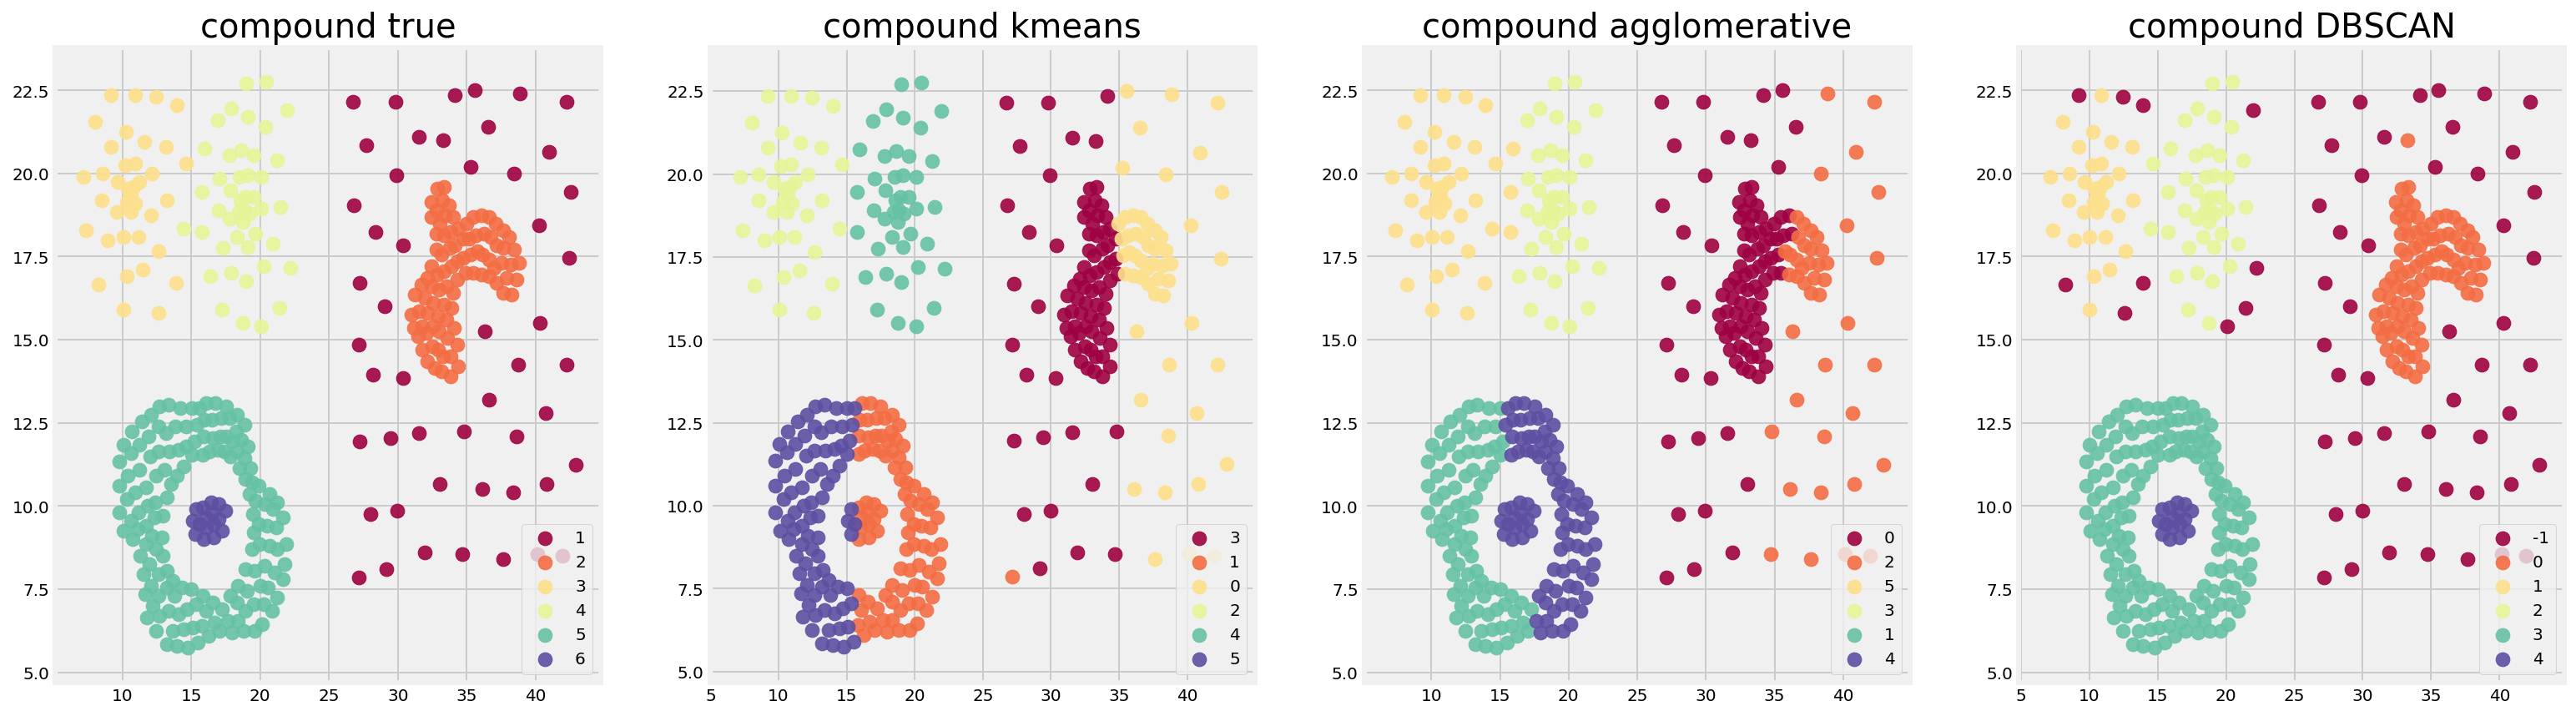

In [12]:
plot_competing_algos(comp, 'compound', n_clusters_kmeans=6, n_clusters_agg=6,
                     dbscan_eps=1.5, dbscan_min_samples=4)

---

### 4.4 Find good parameters for the `jain` dataset

Which algorithm (visually) performs best?

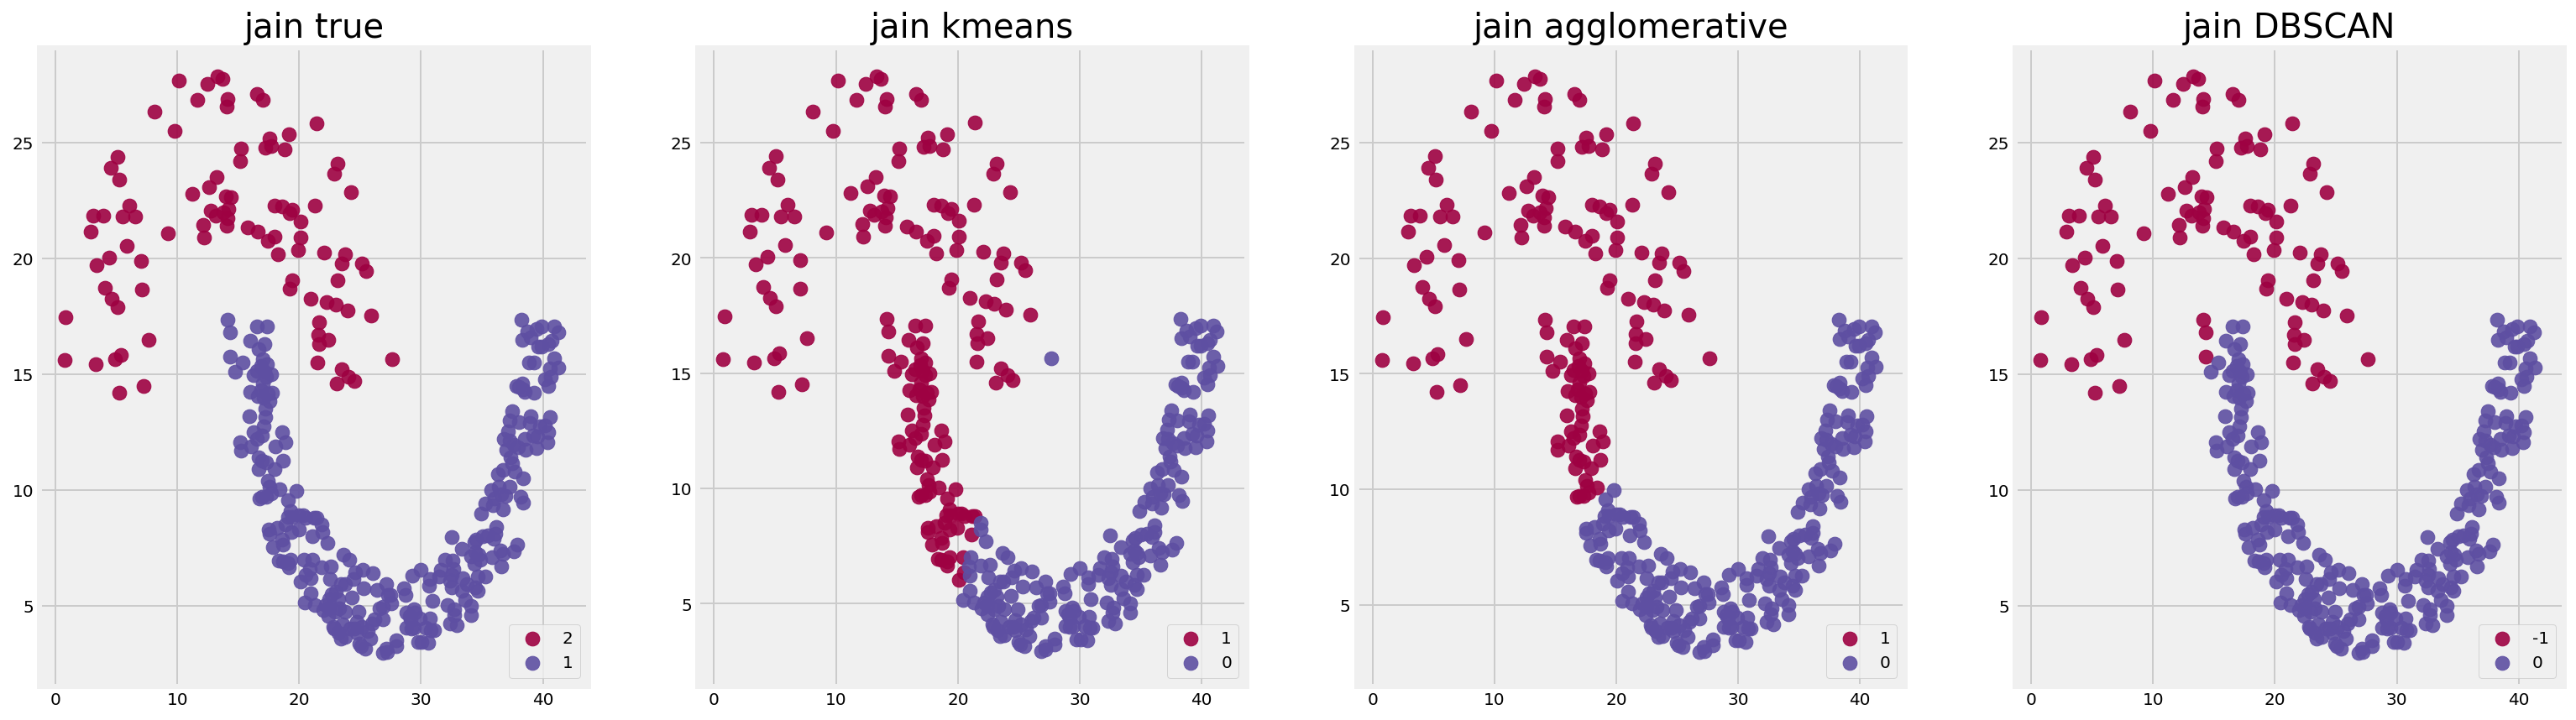

In [13]:
plot_competing_algos(jain, 'jain', n_clusters_kmeans=2, n_clusters_agg=2,
                     dbscan_eps=1.7, dbscan_min_samples=13)

---

### 4.5 Find good parameters for the `pathbased` dataset

Which algorithm (visually) performs best?

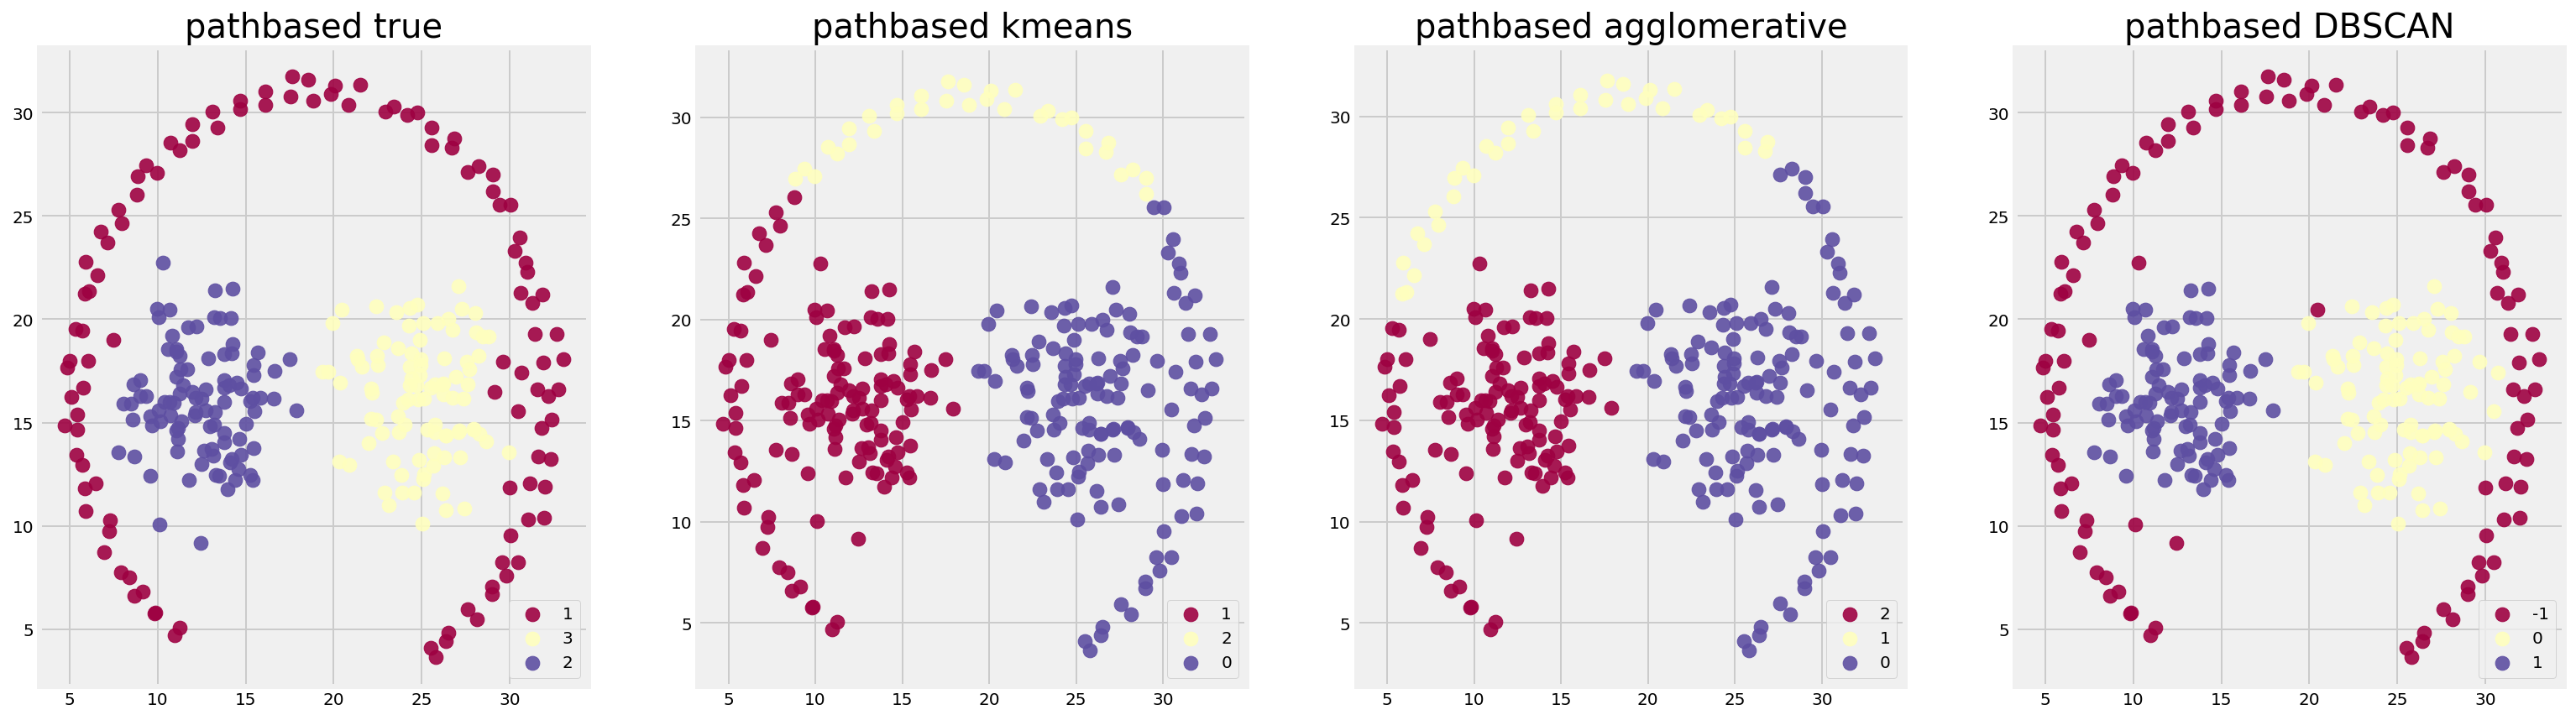

In [14]:
plot_competing_algos(path, 'pathbased', n_clusters_kmeans=3, n_clusters_agg=3,
                     dbscan_eps=2.25, dbscan_min_samples=10)

---

### 4.6 Find good parameters for the `r15` dataset

Which algorithm (visually) performs best?

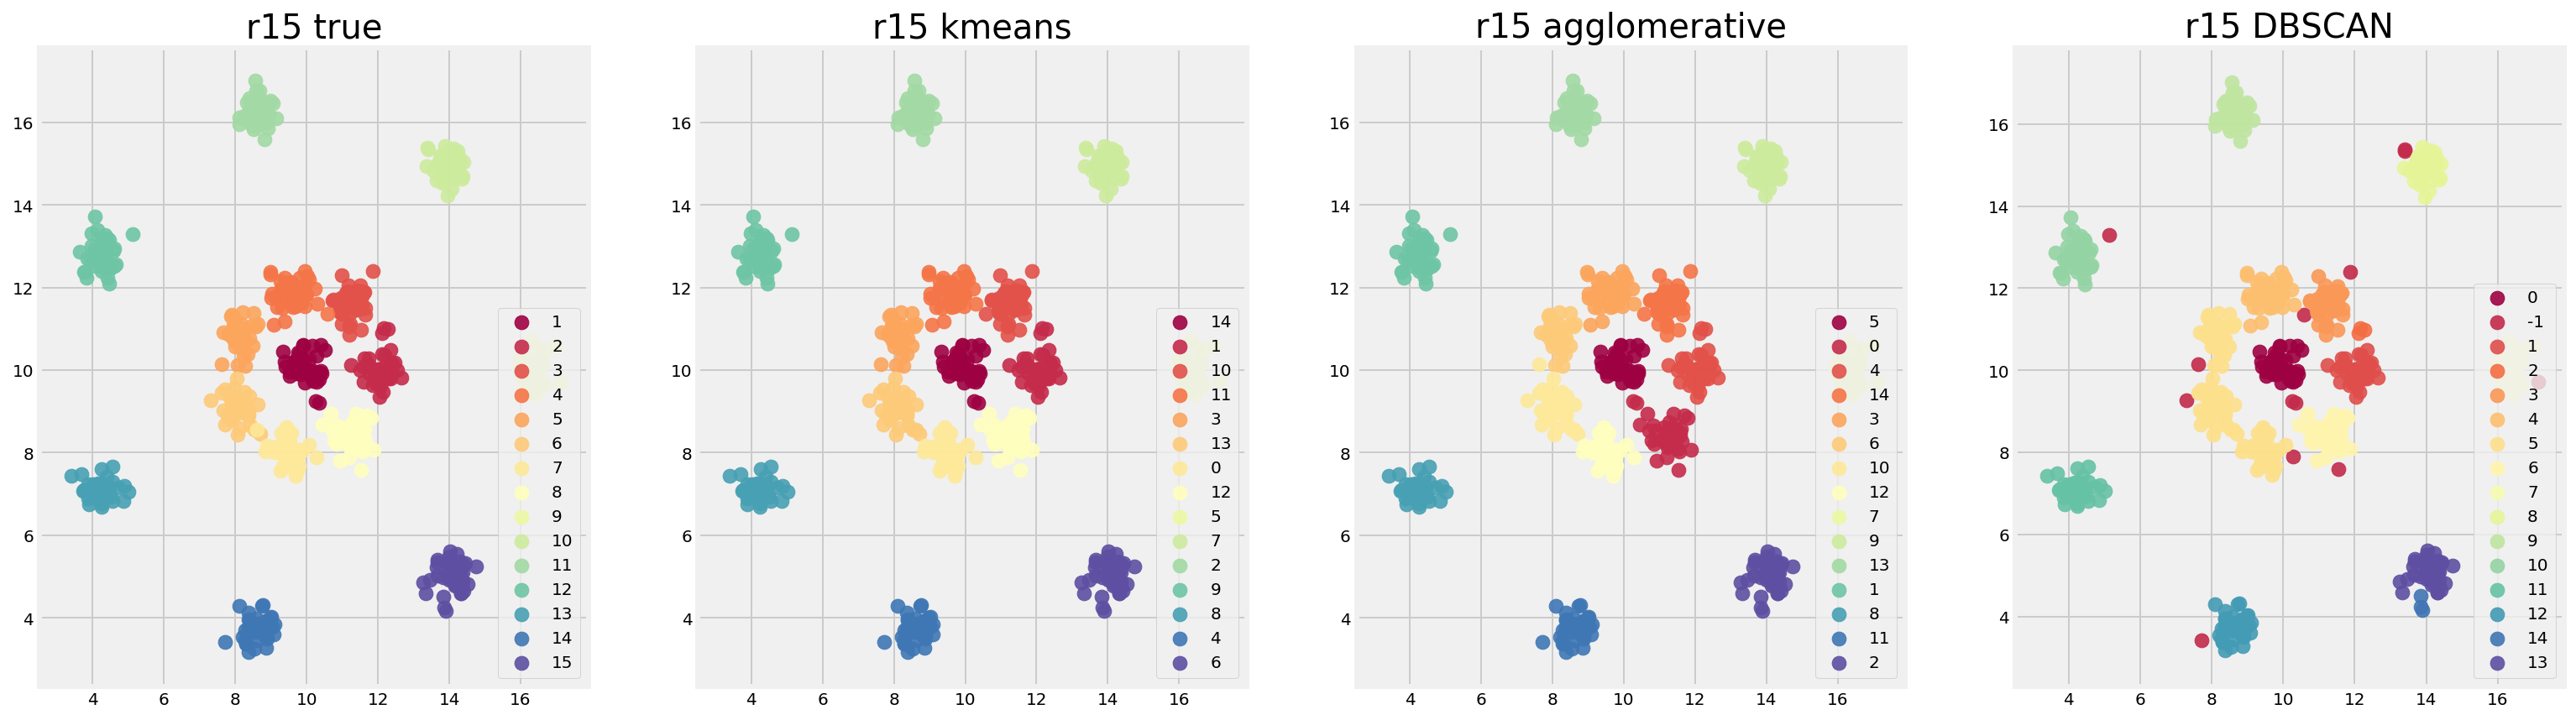

In [15]:
plot_competing_algos(r15, 'r15', n_clusters_kmeans=15, n_clusters_agg=15,
                     dbscan_eps=0.35, dbscan_min_samples=3)

---

### 4.7 Find good parameters for the `spiral` dataset

Which algorithm (visually) performs best?

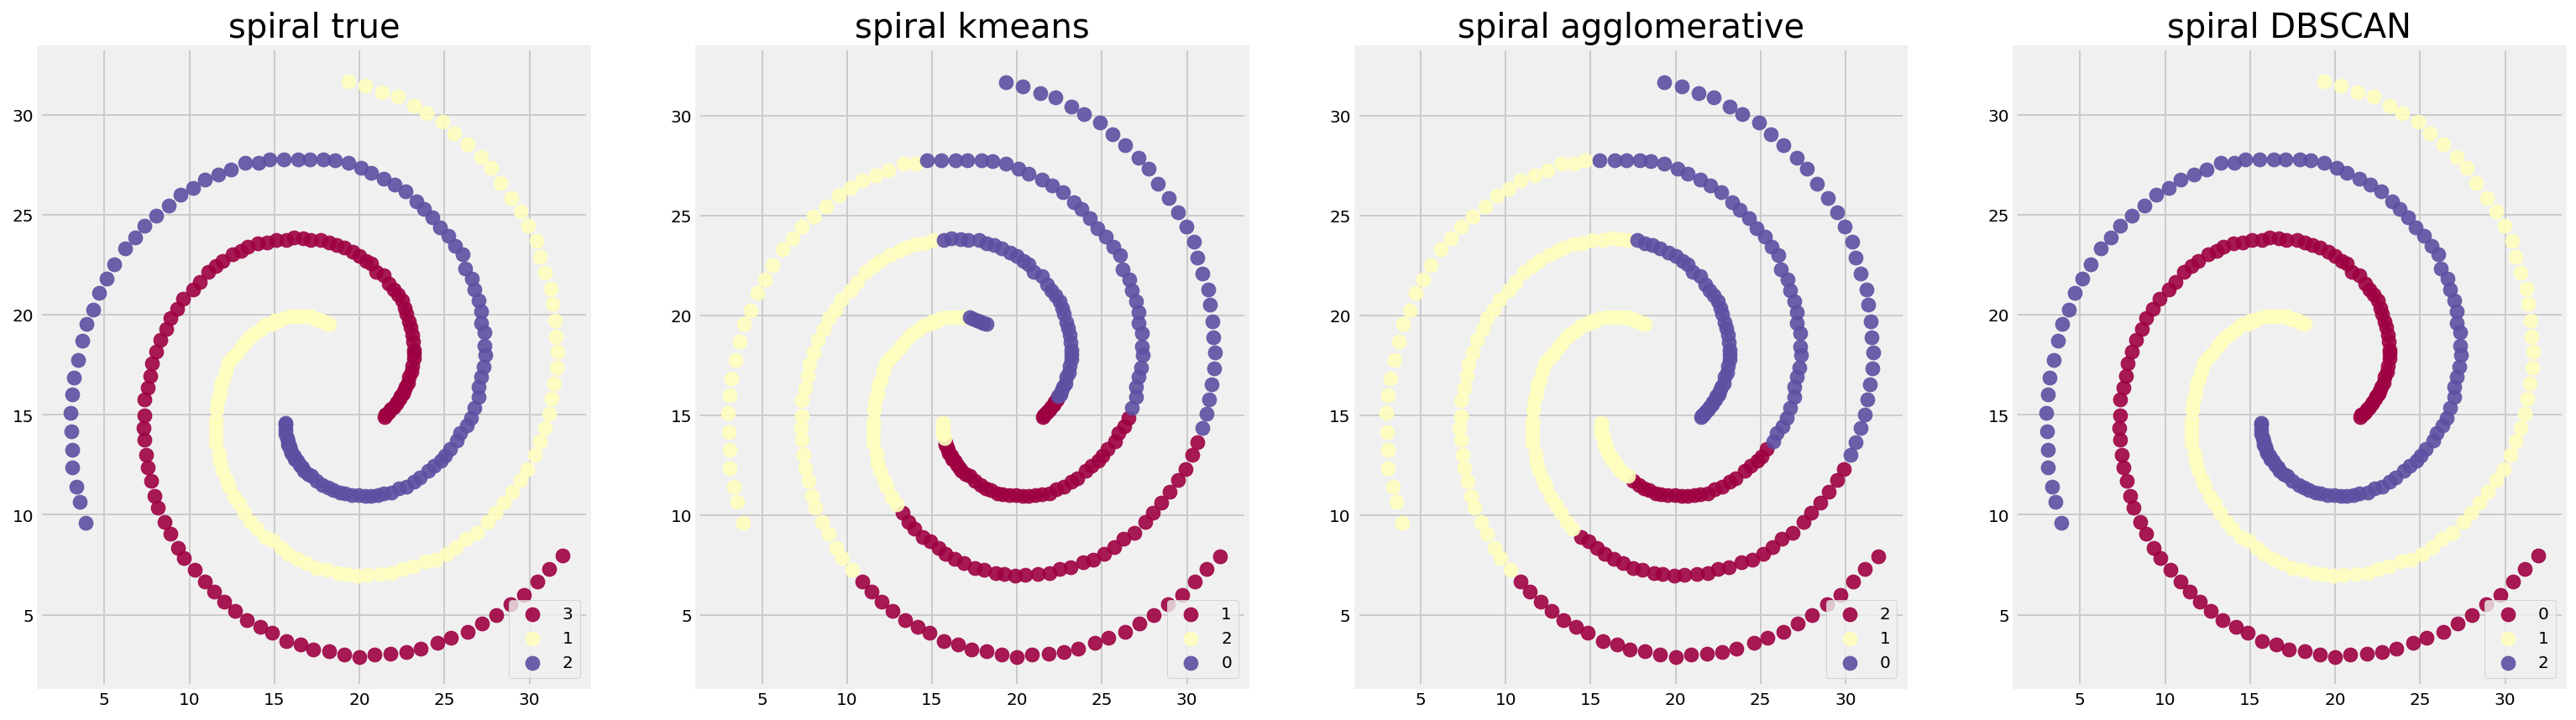

In [16]:
plot_competing_algos(spiral, 'spiral', n_clusters_kmeans=3, n_clusters_agg=3,
                     dbscan_eps=3, dbscan_min_samples=2)

---

## 5. [Bonus] Explore some other clustering algorithms

sklearn comes with a variety of unsupervised clustering algorithms, some of which we have not covered in class. Two algorithms in particular may be of interest to you:

1. [Affinity Propagation](http://scikit-learn.org/dev/modules/clustering.html#affinity-propagation) finds clusters by "sending messages" from points to other points. Points group into clusters based on a "damping factor". The main appeal of affinity propagation is that the number of clusters do not need to be specified by the user (like DBSCAN).
- [Birch](http://scikit-learn.org/dev/modules/clustering.html#birch) finds clusters with a tree-based algorithm (somewhat) reminiscent of decision trees. It finds clusters by evaluating branches/nodes on a tree that best describe the features of the data.